In [18]:
import pandapower as pp
import pandas as pd
from pandapower.plotting import simple_plot

In [19]:
net = pp.create_empty_network()

In [20]:
df_bus = pd.read_excel('IEEE33bus_data.xlsx', sheet_name='bus_data', index_col=0)

In [21]:
df_geo = pd.read_excel('IEEE33bus_data.xlsx', sheet_name='geo_data', index_col=0)

In [22]:
bus_geo_list = []
for i in df_geo.index:
    bus_geo_list.append((df_geo.at[i, 'x'], df_geo.at[i, 'y']))

In [23]:
for i in df_bus.index:
    pp.create_bus(net, vn_kv=df_bus.at[i, 'vn_kv'], max_vm_pu=df_bus.at[i, 'max_vm_pu'], min_vm_pu=df_bus.at[i, 'min_vm_pu'], geodata=bus_geo_list[i])

In [24]:
df_extgrid = pd.read_excel('IEEE33bus_data.xlsx', sheet_name='slack_data', index_col=0)

In [25]:
for i in df_extgrid.index:
    pp.create_ext_grid(net, bus=df_extgrid.at[i, 'bus'], vm_pu=df_extgrid.at[i, 'vm_pu'], va_degree=df_extgrid.at[i, 'va_degree'], max_p_mw=df_extgrid.at[i, 'max_p_mw'], min_p_mw=df_extgrid.at[i, 'min_p_mw'], max_q_mvar=df_extgrid.at[i, 'max_q_mvar'], min_q_mvar=df_extgrid.at[i, 'min_q_mvar'])

In [26]:
df_line = pd.read_excel('IEEE33bus_data.xlsx', sheet_name='line_data', index_col=0)

In [27]:
for i in df_line.index:
    pp.create_line_from_parameters(net, *df_line.loc[i, :])

In [28]:
df_load = pd.read_excel('IEEE33bus_data.xlsx', sheet_name='load_data', index_col=0)

In [29]:
for i in df_load.index:
    pp.create_load(net, bus=df_load.at[i, 'bus'], p_mw=df_load.at[i, 'p_mw'], q_mvar=df_load.at[i,'q_mwar'])

In [30]:
pp.runpp(net, numba=False)

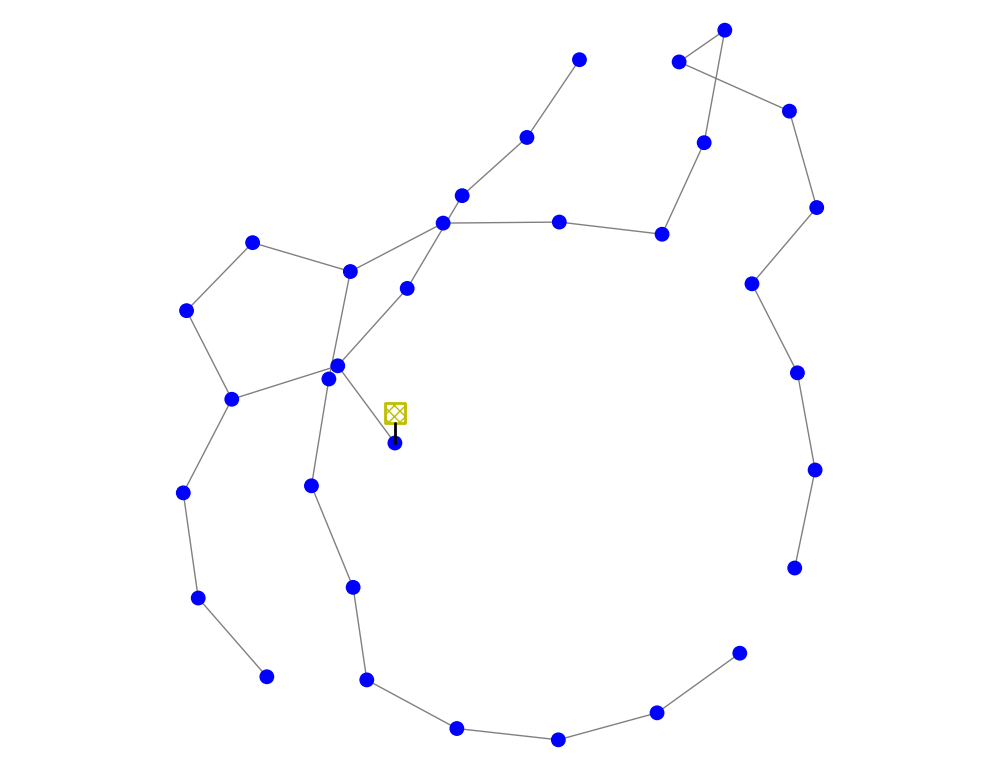

<Axes: >

In [31]:
#Topology of IEEE 33 bus system
simple_plot(net)

In [32]:
net

This pandapower network includes the following parameter tables:
   - bus (33 element)
   - load (32 element)
   - ext_grid (1 elements)
   - line (32 element)
   - bus_geodata (33 element)
 and the following results tables:
   - res_bus (33 element)
   - res_line (32 element)
   - res_ext_grid (1 elements)
   - res_load (32 element)

In [33]:
net.res_bus #Voltage magnitude and angle outputs

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-3.917677,-2.435141
1,0.997032,0.014481,0.100000,0.060000
2,0.982938,0.096042,0.090000,0.040000
3,0.975456,0.161651,0.120000,0.080000
4,0.968059,0.228285,0.060000,0.030000
5,0.949658,0.133853,0.060000,0.020000
6,0.946173,-0.096474,0.200000,0.100000
7,0.941328,-0.060403,0.200000,0.100000
8,0.935059,-0.133484,0.060000,0.020000
9,0.929244,-0.196014,0.060000,0.020000


In [34]:
net.res_load #Power demand of related buses

,p_mw,q_mvar
0,0.100,0.060
1,0.090,0.040
2,0.120,0.080
3,0.060,0.030
4,0.060,0.020
5,0.200,0.100
6,0.200,0.100
7,0.060,0.020
8,0.060,0.020
9,0.045,0.030
